In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path

In [9]:
GCP_FILES = ["01ON630.tif.points", "02ON919.tif.points", "03ON921.tif.points", "04ON618.tif.points", "05ON612.tif.points",  "06ON911.tif.points"]
GCP_FOLDER = "/ofo-share/repos-david/geospatial-data-registration-toolkit/scratch/GCPs"
GCP_ID = 2 # Which file to select

GCP_FILEPATH = Path(GCP_FOLDER,GCP_FILES[GCP_ID])

In [10]:
df = pd.read_csv(GCP_FILEPATH, delimiter=",", skiprows=1)

In [11]:
map_points = gpd.GeoSeries.from_xy(x = df.mapX, y=df.mapY, crs=3310)
source_points = gpd.GeoSeries.from_xy(x = df.sourceX, y=df.sourceY, crs=3310)

In [12]:
map_coords = map_points.get_coordinates().to_numpy()
source_coords = source_points.get_coordinates().to_numpy()

directions = map_coords - source_coords

mean_shift = np.mean(directions, axis=0, keepdims=True)
residuals = directions - mean_shift
residuals

array([[-0.02217495, -0.38966235],
       [ 0.38200602, -0.31183514],
       [-0.41347018, -1.17885011],
       [-0.25219061, -1.16765033],
       [ 0.52780342,  1.27112079],
       [-0.48794315,  1.52984582],
       [ 0.26596945,  0.24703131]])

Show the two sets of points and the shift between them, scaled by 100 times.

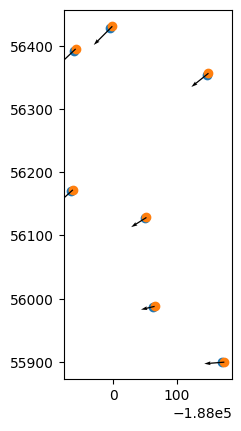

In [13]:
_, ax = plt.subplots()

map_points.plot(ax=ax, )
source_points.plot(ax=ax)
for dir, source_coord in zip(directions, source_coords):
    ax.quiver(source_coord[0], source_coord[1], dir[0], dir[1],  scale=10e-2, units="xy")

plt.show()

Show the two sets of points and the residuals after applying the mean shift, scaled by 1000 times.

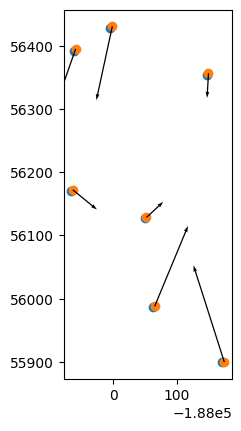

In [14]:
_, ax = plt.subplots()

map_points.plot(ax=ax, )
source_points.plot(ax=ax)
for dir, source_coord in zip(residuals, source_coords):
    ax.quiver(source_coord[0], source_coord[1], dir[0], dir[1],  scale=10e-3, units="xy")

plt.show()